# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1: Reading and Understanding the Data

In [1]:
# Supress all the Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import all the Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file
df=pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# describing the dataset.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# getting the info about columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check the shape of df.
df.shape

(730, 16)

## Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [8]:
# checking for the null values in column data.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There are no missing / Null values either in Columns or Rows.

In [9]:
# Checking the Columns.
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#Renaming few Columns for Better Readibility
df.rename(columns={"yr":"year","mnth":"month","hum":"humidity"},inplace=True)

In [11]:
#Checking the head
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#Checking the Columns
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data Cleaning

Removing unwanted columns

In [13]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# Casual and registered seems to be the breakup by category for cnt column.

df.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [14]:
# Checking for df Columns
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [15]:
#Checking for Shape
df.shape

(730, 12)

In [16]:
#mapping the "Season" column.
df.season=df.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [17]:
#mapping the "Month" column.
df.month=df.month.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [18]:
#mapping the "Weekday" Column
df.weekday=df.weekday.map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thu",5:"fri",6:"sat"})

In [19]:
#mapping the "Weathersit" Column
df.weathersit=df.weathersit.map({1:"Clear",2:"Misty",3:"Light_snowrain",4:"Heavy_snowrain"})

In [20]:
# Checking the head
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Checking the column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Step 2: Visualising the Data

### EXPLORATORY DATA ANALYSIS

- We need to  perform the EDA on TRAINING SET

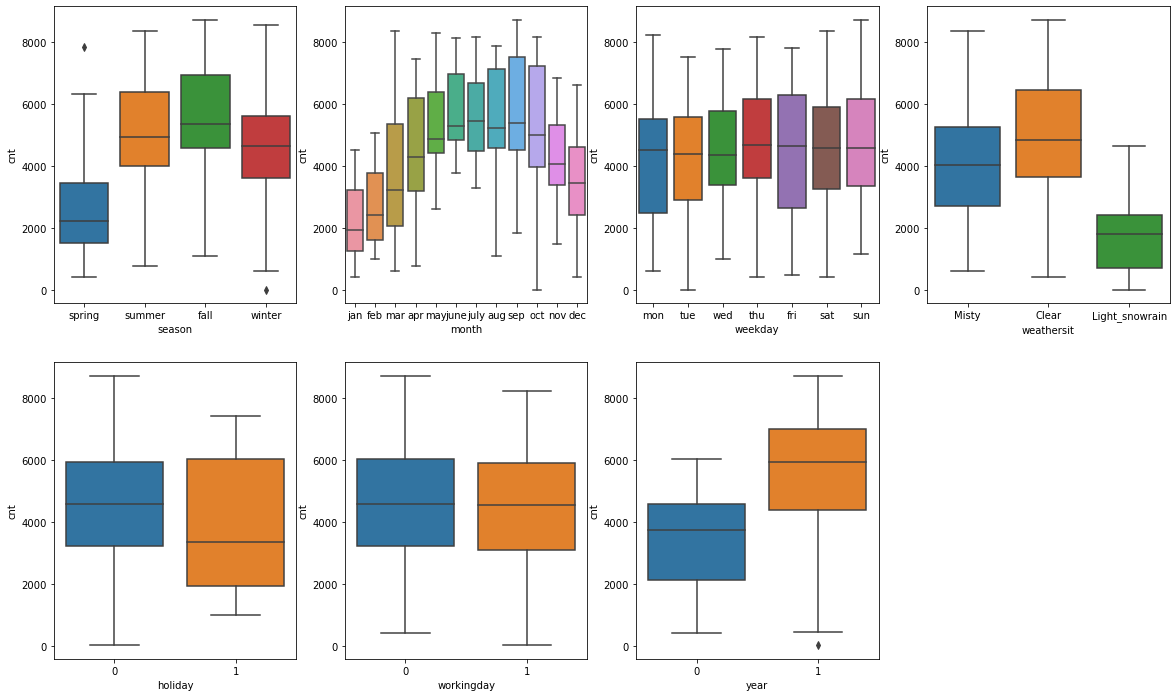

In [22]:
# Analysing/viualising the categorical columns

plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season",y="cnt", data=df)

plt.subplot(2,4,2)
sns.boxplot(x="month",y="cnt",data=df)

plt.subplot(2,4,3)
sns.boxplot(x="weekday",y="cnt",data=df)

plt.subplot(2,4,4)
sns.boxplot(x="weathersit",y="cnt",data=df)

plt.subplot(2,4,5)
sns.boxplot(x="holiday",y="cnt",data=df)

plt.subplot(2,4,6)
sns.boxplot(x="workingday",y="cnt",data=df)

plt.subplot(2,4,7)
sns.boxplot(x="year",y="cnt", data=df)
plt.show()

In [23]:
# Function to Create Barplot related to Categorical columns.

def plot_cat_columns(column):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,"cnt",data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,"cnt",data=df,hue="year",palette="Set2")
    plt.legend(labels=["2018","2019"])
    plt.show()

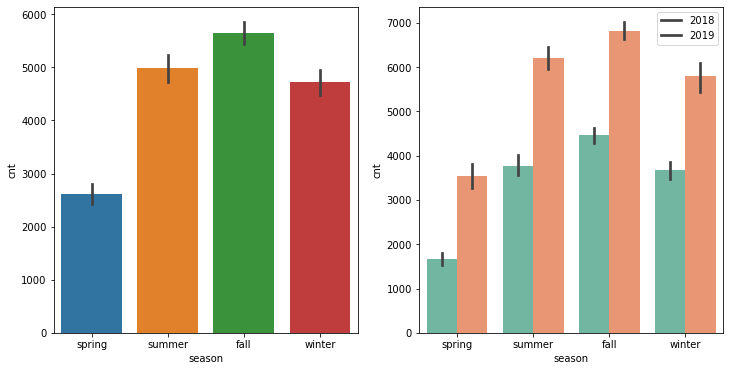

In [24]:
#plotting visualisation for season column

plot_cat_columns("season")

### Insights
Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

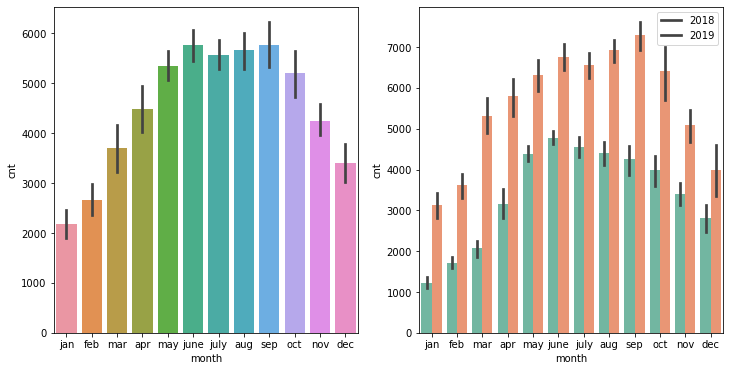

In [25]:
# plotting visualisation for month column

plot_cat_columns("month")

### Insights
Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.
Number of booking for each month seems to have increased from 2018 to 2019.

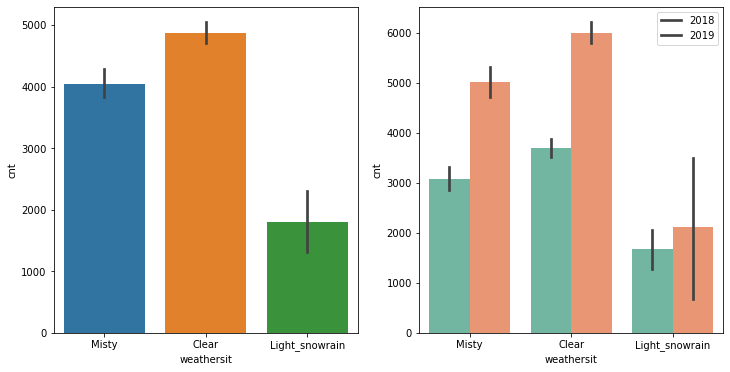

In [26]:
# Plotting visualisation for weathersit column

plot_cat_columns("weathersit")

### Insights
Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

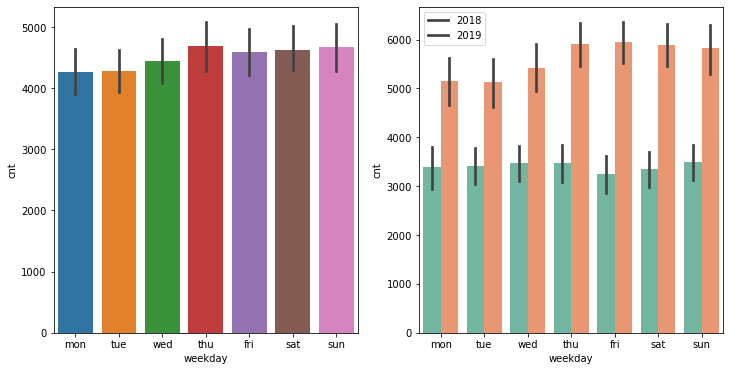

In [27]:
# Plotting Visualisation for weekday column

plot_cat_columns("weekday")

### Insights
Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

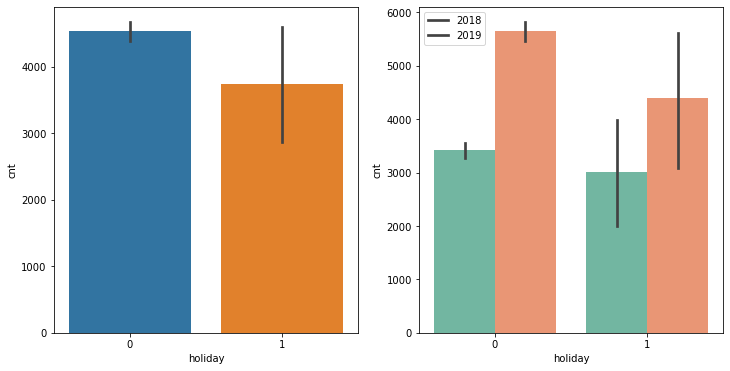

In [28]:
# Plotting Visualisation for holiday column

plot_cat_columns("holiday")

### Insights
When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

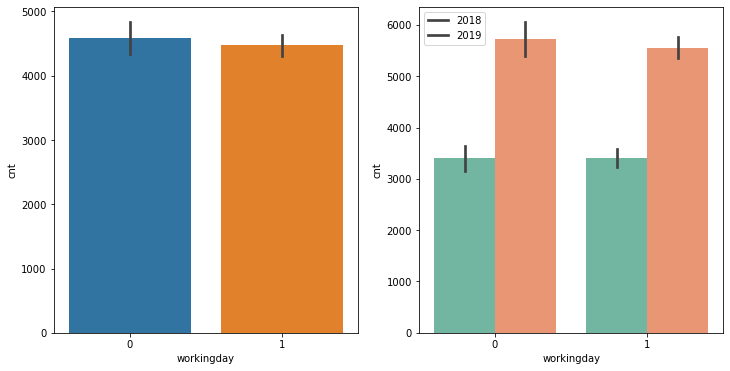

In [29]:
# Plotting Visualisation for working column

plot_cat_columns("workingday")

### Insights
Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

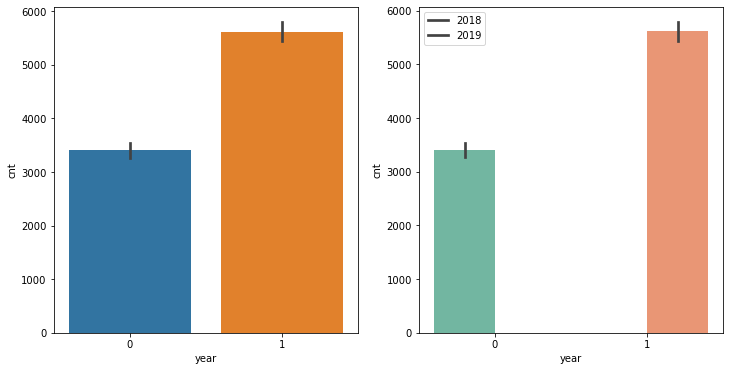

In [30]:
# Plotting Visualisation for year column

plot_cat_columns("year")

### Insights
2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

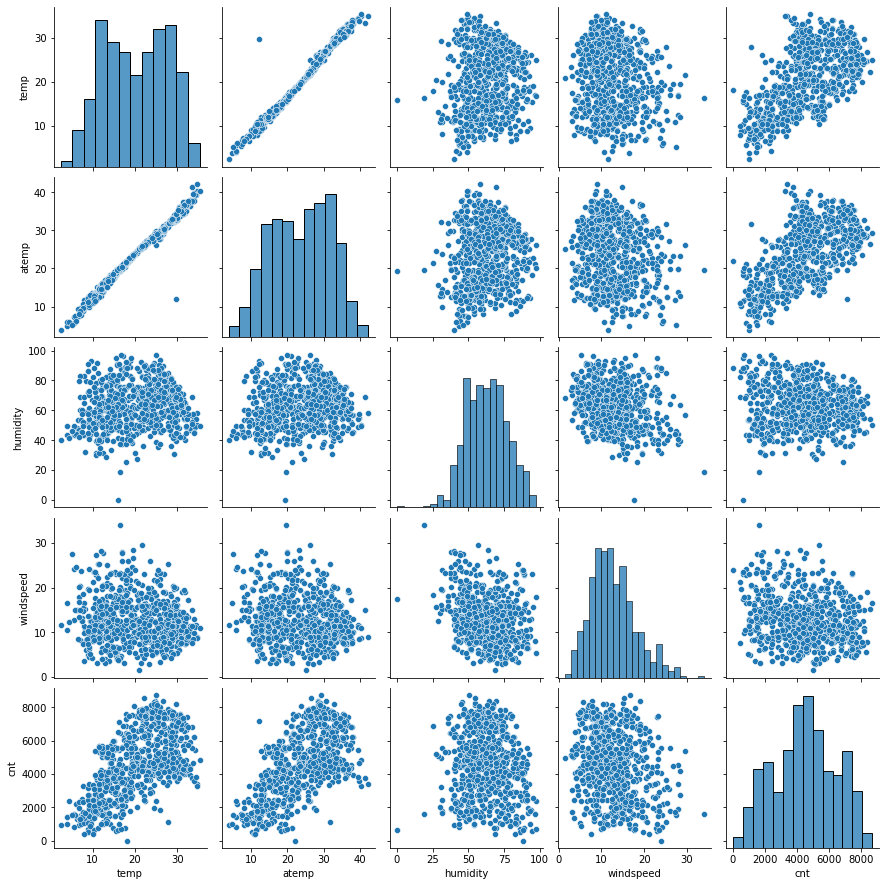

In [31]:
# Analysiong/Visualising the numerical columns

sns.pairplot(data=df,vars=["temp","atemp","humidity","windspeed","cnt"])
plt.show()

### Insights
- Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## Correlation Matrix

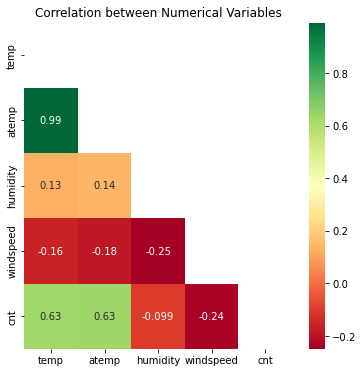

In [32]:
# Checking the correlation between the numerical variables

plt.figure(figsize=(6,6))
matrix=np.triu(df[["temp","atemp","humidity","windspeed","cnt"]].corr())
sns.heatmap(df[["temp","atemp","humidity","windspeed","cnt"]].corr(),annot=True,cmap="RdYlGn",mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

## Insights
#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to Multicollinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Step 3: Data Preparation

Creating Dummy Variables
- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 

In [33]:
# Dummy variable creation for month,weekday,weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [34]:
# Checking the head
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [35]:
# Merging the dataframe, with the dummy variabale dataset.

df_new=pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [36]:
# Checking the head
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [37]:
# Checking the info
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [38]:
# Dropping unwanted columns as we have already created dummy variable 

df_new.drop(["season","month","weekday","weathersit"],axis=1, inplace=True)

In [39]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
# Check the shape
df_new.shape

(730, 30)

In [41]:
# Check the column info of new dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [42]:
# Splitting the dataframe into Train and Test set

np.random.seed(0)
df_train,df_test= train_test_split(df_new,train_size=0.7,random_state=100)

In [43]:
# Check the shape of training dataset
df_train.shape

(510, 30)

In [44]:
# Check the shape of testing dataset
df_test.shape

(220, 30)

### Rescaling the Feautures

In [45]:
# Using MinMaxScaler to Rescaling the features.
scaler=MinMaxScaler()

In [46]:
# Verifying the head of the dataset before scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [47]:
# Apply Scaler() to all the columns except the "yes-no" and "dummy" variables
num_vars=["temp","atemp","humidity","windspeed","cnt"]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [48]:
# Verifying the head after applying scaling.
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [49]:
# describing the dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Matrix

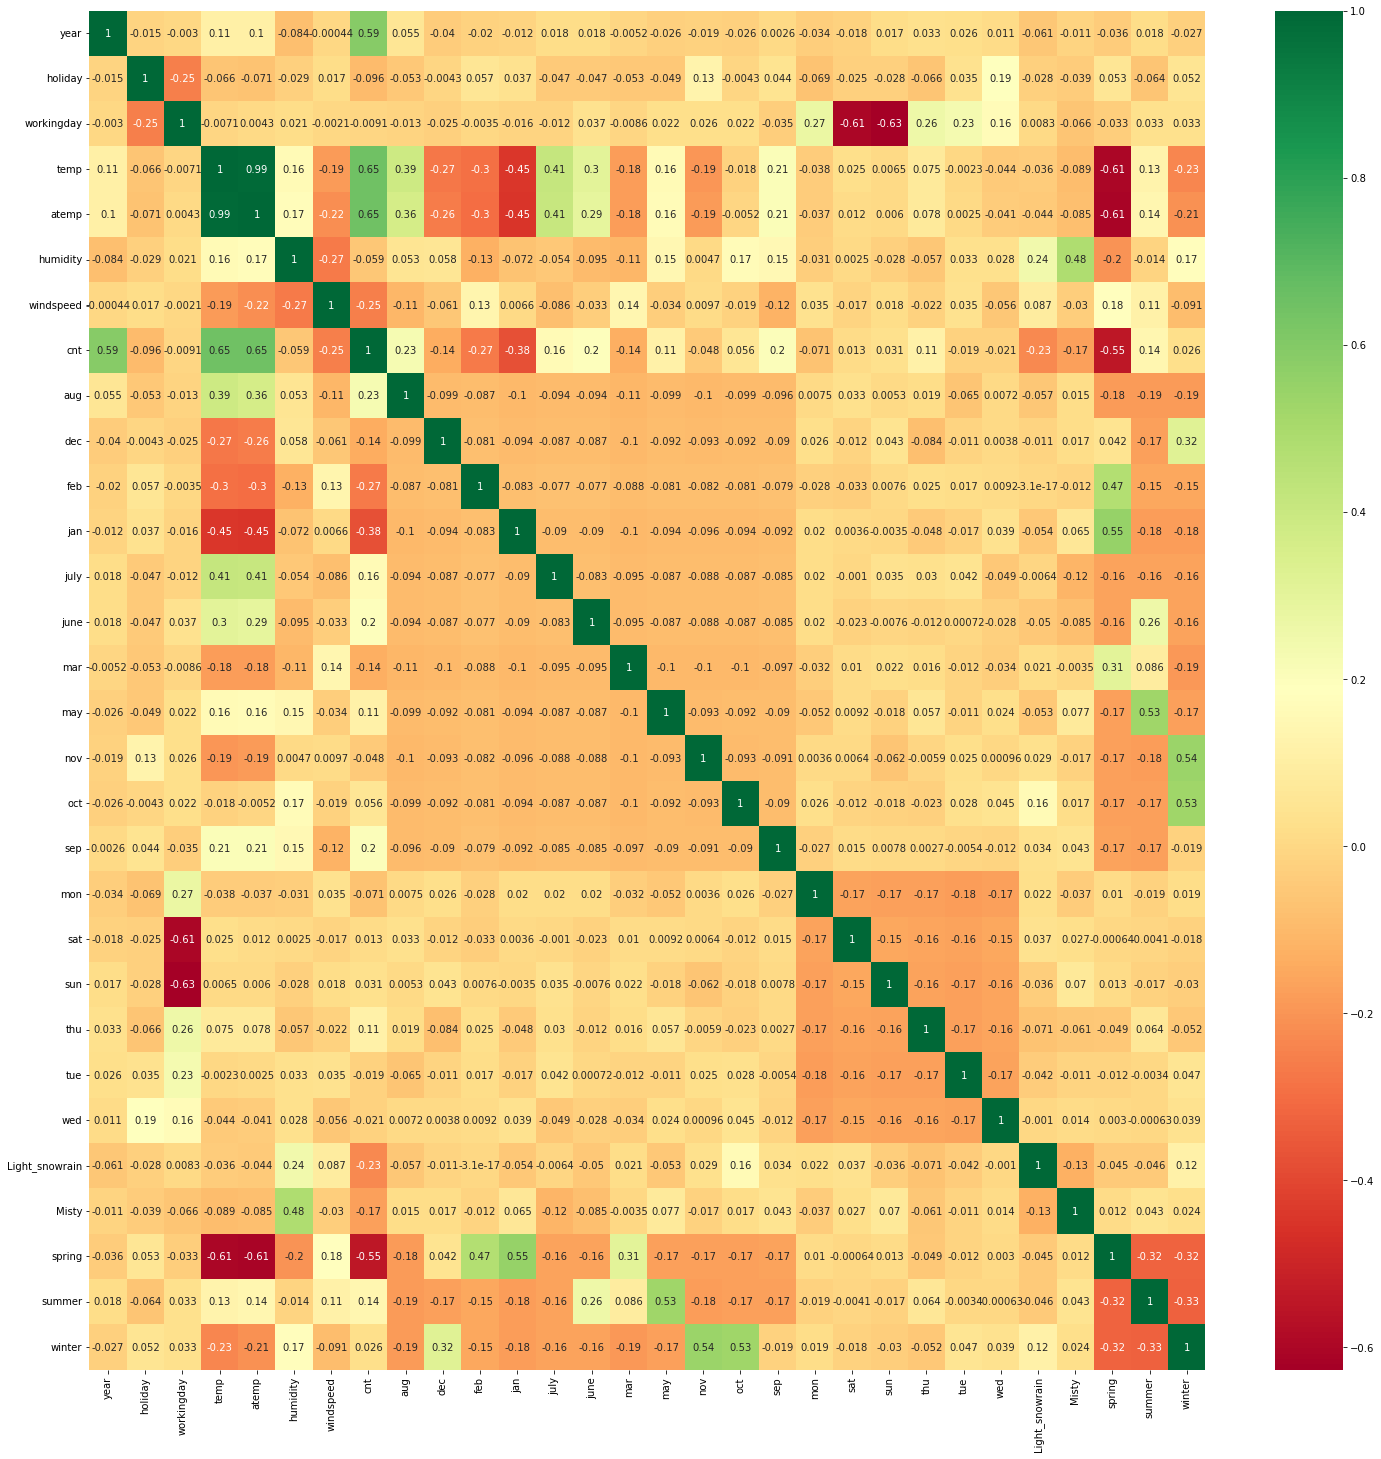

In [50]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")
plt.show()

## Insights
"cnt" seems to have correlation with "year" variable and "temp". 

Similarly, "Misty" and "humidity" show correlation. 

 "Spring" season with "Jan" and "Feb" month, "Summer" season with "may" month and "Winter" season with "oct" and "nov" month show good correlation.

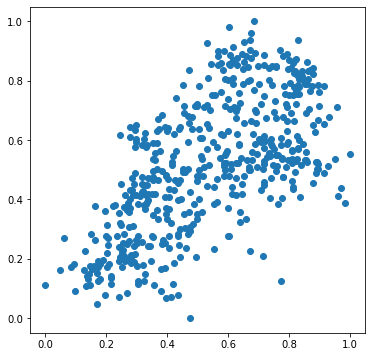

In [51]:
# Visualising one of the correlation to see the trends via scatter plot.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp,df_train.cnt)
plt.show()

### Insights
Visualization confirms the positive correlation between "temp" and "cnt".

# Building the linear Model

Dividing into X and Y sets for the model building

In [52]:
y_train=df_train.pop("cnt")
X_train=df_train

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn**  for its compatibility with RFE (which is a utility from sklearn)

In [53]:

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15) 
rfe=rfe.fit(X_train,y_train)


In [54]:
# List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [55]:
# Selecting the selected variable via RFE in col list.
col=X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [56]:
# Checking which columns has been Rejected.
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [57]:
# Generic function to calculate VIF of variables.

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [58]:
# Dataframe with RFE selected variables.
X_train_rfe=X_train[col]

In [59]:
# Calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


humidity shows high VIF value

# Step 5: Building a Linear Model using "Stats Model"

## Model 1

In [60]:
# Building 1st Linear Regression Model
X_train_lm_1=sm.add_constant(X_train_rfe)
lr_1=sm.OLS(y_train,X_train_lm_1).fit()

# Print a summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        22:53:50   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [61]:
# Check the parameters 
lr_1.params 

const             0.319667
year              0.230404
holiday          -0.091089
temp              0.481503
humidity         -0.162213
windspeed        -0.188726
dec              -0.035461
jan              -0.043411
july             -0.055250
nov              -0.038701
sep               0.075467
Light_snowrain   -0.246481
Misty            -0.054300
spring           -0.061255
summer            0.042337
winter            0.101921
dtype: float64

### VIF Check

In [62]:
# As humidity shows high VIF values hence we can drop it
X_train_new=X_train_rfe.drop(["humidity"],axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


VIF values seems to be good now. But we will see if can reduce further?

## Model 2

In [63]:
# Building 2nd Linear Regression Model

X_train_lm_2=sm.add_constant(X_train_new)
lr_2=sm.OLS(y_train,X_train_lm_2).fit()

# Print a summary 
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        22:53:50   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [64]:
# Check the parameters
lr_2.params

const             0.245029
year              0.234455
holiday          -0.091776
temp              0.438717
windspeed        -0.158482
dec              -0.042806
jan              -0.050008
july             -0.050046
nov              -0.039513
sep               0.068730
Light_snowrain   -0.291749
Misty            -0.080073
spring           -0.071257
summer            0.034890
winter            0.086883
dtype: float64

### VIF Check

In [65]:
# We can drop nov variable as it has high p-value
X_train_new=X_train_new.drop(["nov"],axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

## Model 3

In [66]:
# Building 3rd Linear rergression model

X_train_lm_3=sm.add_constant(X_train_new)
lr_3=sm.OLS(y_train,X_train_lm_3).fit()

# Print a summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          2.74e-186
Time:                        22:53:51   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [67]:
# Check the parameters obtained
lr_3.params

const             0.228272
year              0.234275
holiday          -0.098193
temp              0.458108
windspeed        -0.159364
dec              -0.028270
jan              -0.045128
july             -0.049881
sep               0.074195
Light_snowrain   -0.287829
Misty            -0.079315
spring           -0.063192
summer            0.040370
winter            0.077434
dtype: float64

### VIF Check

In [68]:
# We can drop dec variable as it has high p-value
X_train_new=X_train_new.drop(["dec"],axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


## Model 4

In [69]:
# Building 4th Linear Regression Model

X_train_lm_4=sm.add_constant(X_train_new)
lr_4=sm.OLS(y_train,X_train_lm_4).fit()

# Print a summary of the linear regression model obtained
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          8.14e-187
Time:                        22:53:51   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [70]:
# Check the parameters obtained
lr_4.params

const             0.215392
year              0.234283
holiday          -0.096758
temp              0.472115
windspeed        -0.154916
jan              -0.038259
july             -0.050347
sep               0.076399
Light_snowrain   -0.285425
Misty            -0.079277
spring           -0.061696
summer            0.043385
winter            0.075655
dtype: float64

### VIF Check

In [71]:
# We can drop jan variable as it has high p-value
X_train_new=X_train_new.drop(["jan"],axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


## Model 5

In [72]:
# Building 5th linear Regression Model

X_train_lm_5=sm.add_constant(X_train_new)
lr_5=sm.OLS(y_train,X_train_lm_5).fit()

# Print a summary of the linear regression model obtained
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          5.06e-187
Time:                        22:53:51   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [73]:
# Check the parameters obtained
lr_5.params

const             0.199434
year              0.233570
holiday          -0.097463
temp              0.490988
windspeed        -0.147919
july             -0.052057
sep               0.076846
Light_snowrain   -0.284199
Misty            -0.080167
spring           -0.067169
summer            0.046487
winter            0.081741
dtype: float64

### VIF Check

In [74]:
# We can drop july variable as it has high p-value
X_train_new=X_train_new.drop(["july"],axis=1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


VIF value now seems to be good as it below 5

## Model 6

In [75]:
# Building 6th Linear Regression Model

X_train_lm_6=sm.add_constant(X_train_new)
lr_6=sm.OLS(y_train,X_train_lm_6).fit()

# Print a summary of the linear regression model obtained
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.47e-186
Time:                        22:53:51   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

In [76]:
# Check the parameters obtained
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## Insights

We can cosider the above model i.e lr_6, as it seems to have very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.

F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [77]:
# Checking the parameters and their coefficient values
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

## Final Model Interpretation

### Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr_6 model coefficient values

- const             0.190855
- year              0.234132
- holiday          -0.096316
- temp              0.477737
- windspeed        -0.148098
- sep               0.090998
- Light_snowrain   -0.285031
- Misty            -0.078741
- spring           -0.055406
- summer            0.062076
- winter            0.094476

 Insights
from the lr_6 model summary, it is evident that all our coefficients are not equal to zerowhich means **We Reject the Null Hypothesis.**
    

# Step 6: Residual Analysis of the train data and validation

In [78]:
X_train_lm_6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [79]:
y_train_pred=lr_6.predict(X_train_lm_6)

### Normality of Error terms

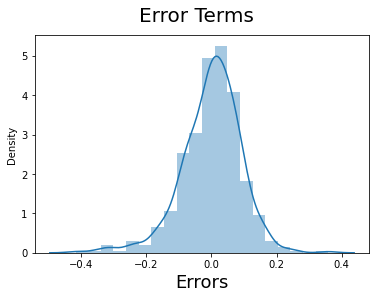

In [80]:
# Plot the histogram of the Error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle("Error Terms", fontsize = 20) 
plt.xlabel("Errors", fontsize = 18)
plt.show()

### Insights
- From the above histogram, We could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Multicollinearity

In [81]:
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


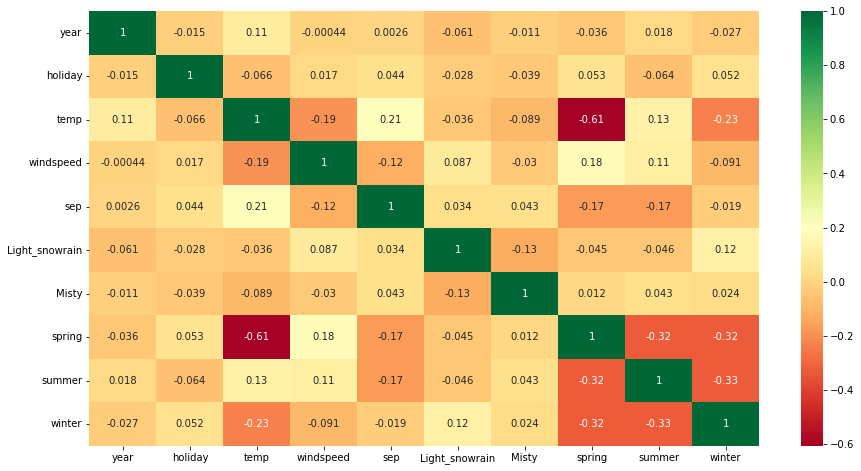

In [82]:
# Plotting Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot=True,cmap="RdYlGn")
plt.show()

### Insights
- VIF values are less than 5 which is good and also there is no Multicollinearity as seen from the Heatmap

### Linearity

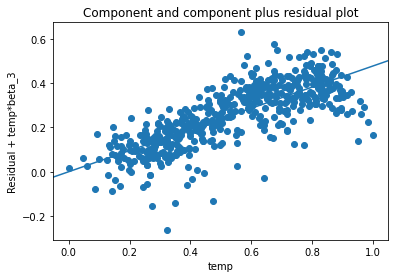

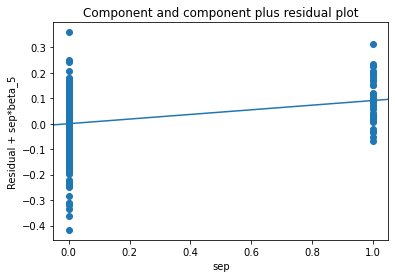

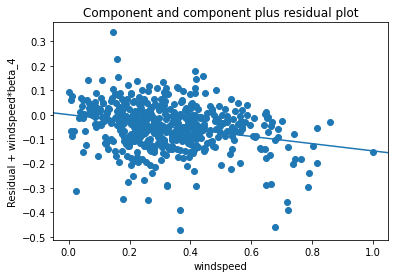

In [83]:
# Linear Relationship validation using CCPR Plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6,"temp")
plt.show()

sm.graphics.plot_ccpr(lr_6,"sep")
plt.show()

sm.graphics.plot_ccpr(lr_6,"windspeed")
plt.show()

### Insights
Linearity can be observed from above Visualisations.

### Homoscedasticity

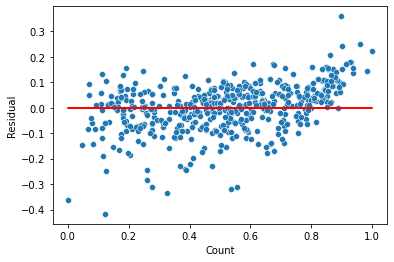

In [84]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), "-r")
plt.xlabel("Count")
plt.ylabel("Residual")
plt.show()

### Insights
No Visible Pattern observed from above Plot for Residuals.

## Independence of Residuals

Durbin-Watson value of final model lr_6 is 2.085,which signifies there is no autocorrelation.

# Step 7:Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of Error terms, now we can make predictions using the final, i.e. 6th Model.

In [85]:
# Apply scaling on the test dataset

num_vars=["temp","atemp","humidity","windspeed","cnt"]
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [86]:
# describing the test data
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
y_test=df_test.pop("cnt")
X_test=df_test

In [88]:
col1=X_train_new.columns

X_test= X_test[col1]

# Adding Constant variable to test dataframe
X_test_lm_6=sm.add_constant(X_test)

In [89]:
y_pred=lr_6.predict(X_test_lm_6)

R^2 Value for TEST

In [90]:
r2=r2_score(y_test,y_pred)
round(r2,4)

0.8038

# Step 8: Model Evaluation

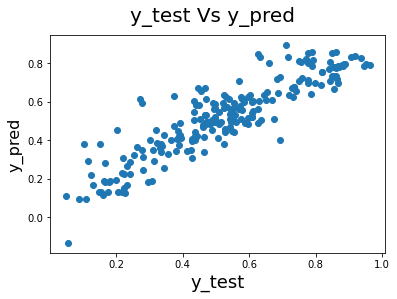

In [91]:
# Plotting y_test and y_pred to Understand the distribution 

fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test Vs y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_pred",fontsize=16)
plt.show()

In [92]:
# Checking the parameters and their coefficient values
round(lr_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [93]:
lr_6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          1.47e-186
Time:                        22:53:54   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.447      0.000       0.133       0.249
year               0.2341      0.008     28.237      0.000       0.218       0.250
holiday           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp               0.4777      0.033     14.423      0.000       0.413       0.543
windspeed         -0.1481      0.025     -5.854      0.000      -0.198      -0.098
sep                0.0910      0.016      5.566      0.000       0.059       0.123
Light_snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer             0.0621      0.014      4.350      0.000       0.034       0.090
winter             0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the Equation of our best fitted line is:

$ cnt = 0.1909 + 0.2341  \times  year - 0.0963  \times  holiday + 0.4777 \times temp - 0.1481 \times windspeed + 0.0910 \times sep - 0.2850 \times Light_snowrain - 0.0787 \times Misty - 0.0554 \times spring + 0.0621 \times summer + 0.0945 \times winter $

### Adjusted R^2 Value for TEST

In [94]:
# Calculating Adjusted-R^2 Value for the test dataset
adjusted_r2=round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


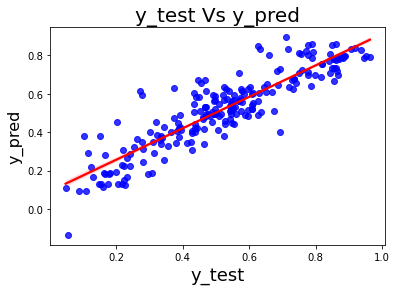

In [95]:
# Visualising the fit on the test data
# Plotting a Regression Plot

plt.figure()
sns.regplot(x=y_test,y=y_pred,ci=68,fit_reg=True,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.title("y_test Vs y_pred", fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_pred",fontsize=16)
plt.show()

# Final Result Comparison

## Comparision between Training and Testing dataset:
 -    Train dataset R^2          : 0.833
 -    Test dataset R^2           : 0.8038
 -    Train dataset Adjusted R^2 : 0.829    
 -    Test dataset Adjusted R^2  : 0.7944

 -    This seems to be a really good model that can very well 'Generalize' various datasets.
 
 
Demand for rentals of Bikes maily depends on holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.